In [1]:
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn
from torch.optim import Adam, SGD
import torch.optim.lr_scheduler as scheduler
from torch.utils.data import random_split,DataLoader

import torchvision
from torchvision.datasets import CIFAR10,CIFAR100
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor,Normalize

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.device(0))

cuda
0
1
GeForce RTX 3090


In [3]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

device = torch.device('cuda:0' if USE_CUDA else 'cpu')
print('학습을 진행하는 기기:',device)

True
학습을 진행하는 기기: cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
ds10=CIFAR10(root="./data",download=True,train=True,transform=transform)
ts10=CIFAR10(root="./data",download=True,train=False,transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
tr10,vs10,_=random_split(ds10,[10000,10000,30000],torch.manual_seed(1))

In [7]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10),
            )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = out.view(-1,16*5*5)
        out = self.layer3(out)
        return out


In [8]:
myCnn=MyCNN().to(device)
training_epochs=20
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [9]:
tr10_loader=DataLoader(dataset=tr10,
                      batch_size=batch_size,
                      shuffle=True,
                      drop_last=True)

vs10_loader=DataLoader(dataset=vs10,
                      batch_size=batch_size,
                      shuffle=False)

In [10]:
start=time.time()

training_loss_history=[]
validation_loss_history=[]

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr10_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
        training_loss+=cost.item()
        
    with torch.no_grad():
        for X,y in vs10_loader:
            X=X.to(device)
            y=y.to(device)
            
            output=myCnn(X)
            cost=obj(output,y)
            
            validation_loss+=cost.item()
            
#    if epoch==39:        
#        sch.step()        
    training_loss_history.append(training_loss/(10000/batch_size))
    validation_loss_history.append(validation_loss/(10000/batch_size))
    print("[ Epoch: ",epoch+1," loss :",training_loss/(10000/batch_size)," validation :",validation_loss/(10000/batch_size),"]")
    
print("Time :",time.time()-start)

[ Epoch:  1  loss : 2.17926369805336  validation : 2.0051229959487915 ]
[ Epoch:  2  loss : 1.9081601224899292  validation : 1.8409118980646133 ]
[ Epoch:  3  loss : 1.7061097392082214  validation : 1.6530946696281432 ]
[ Epoch:  4  loss : 1.5698561147093772  validation : 1.5655603044629096 ]
[ Epoch:  5  loss : 1.4904791043281556  validation : 1.5463597180008888 ]
[ Epoch:  6  loss : 1.4211131207704544  validation : 1.4615134775280954 ]
[ Epoch:  7  loss : 1.3656096070289612  validation : 1.4388399600207806 ]
[ Epoch:  8  loss : 1.3008567238092423  validation : 1.435012544721365 ]
[ Epoch:  9  loss : 1.2378791587531566  validation : 1.417155717217922 ]
[ Epoch:  10  loss : 1.177666831716895  validation : 1.4032735504448415 ]
[ Epoch:  11  loss : 1.121879181294143  validation : 1.4645594414651395 ]
[ Epoch:  12  loss : 1.069037958934903  validation : 1.575222055530548 ]
[ Epoch:  13  loss : 1.0048735180675983  validation : 1.4833035726979376 ]
[ Epoch:  14  loss : 0.9377122679080814  v

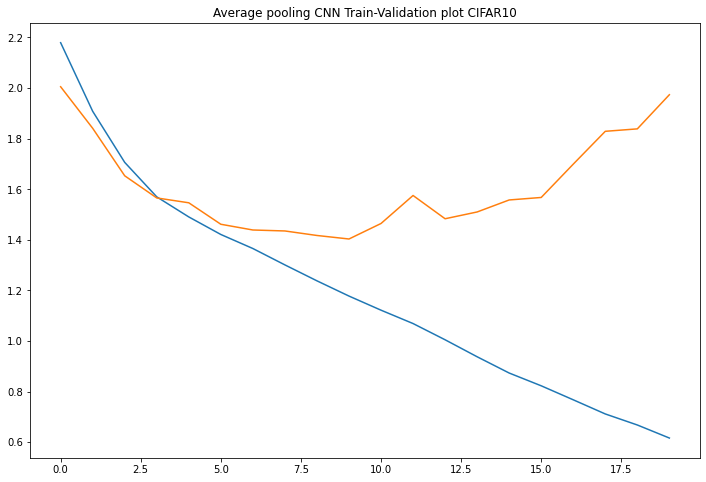

In [11]:
plt.figure(figsize=(12,8))
plt.plot(training_loss_history)
plt.plot(validation_loss_history)
plt.title("Average pooling CNN Train-Validation plot CIFAR10")
plt.savefig("Average pooling CNN Train-Validation plot CIFAR10.png")

In [12]:
myCnn=MyCNN().to(device)
training_epochs=10
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [13]:
start=time.time()

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr10_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
print("Time :",time.time()-start)

Time : 74.15833115577698


In [14]:
ts10_loader=DataLoader(dataset=ts10,
                      batch_size=batch_size,
                      shuffle=False)

In [15]:
start=time.time()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in ts10_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = myCnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy :',(100 * correct / total))
print("Time :",time.time()-start)

Accuracy : 50.56
Time : 4.028950214385986


In [16]:
ds100=CIFAR100(root="./data",download=True,train=True,transform=transform)
ts100=CIFAR100(root="./data",download=True,train=False,transform=transform)
tr100,vs100,_=random_split(ds100,[10000,10000,30000],torch.manual_seed(1))

Files already downloaded and verified
Files already downloaded and verified


In [17]:
tr100_loader=DataLoader(dataset=tr100,
                      batch_size=batch_size,
                      shuffle=True,
                      drop_last=True)

vs100_loader=DataLoader(dataset=vs100,
                      batch_size=batch_size,
                      shuffle=False)

In [18]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,100),
            )
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        #out = out.view(out.size(0),-1) #Flatten feature mapes to one-dimension vector
        out = out.view(-1,16*5*5)
        out = self.layer3(out)
        return out


In [19]:
myCnn=MyCNN().to(device)
training_epochs=20
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [20]:
start=time.time()

training_loss_history_=[]
validation_loss_history_=[]

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr100_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
        training_loss+=cost.item()
        
    with torch.no_grad():
        for X,y in vs100_loader:
            X=X.to(device)
            y=y.to(device)
            
            output=myCnn(X)
            cost=obj(output,y)
            
            validation_loss+=cost.item()
            
#    if epoch==39:        
#        sch.step()        
    training_loss_history_.append(training_loss/(10000/batch_size))
    validation_loss_history_.append(validation_loss/(10000/batch_size))
    print("[ Epoch: ",epoch+1," loss :",training_loss/(10000/batch_size)," validation :",validation_loss/(10000/batch_size),"]")
    
print("Time :",time.time()-start)

[ Epoch:  1  loss : 4.596752449607849  validation : 4.538890958404541 ]
[ Epoch:  2  loss : 4.391659169578552  validation : 4.253955417919159 ]
[ Epoch:  3  loss : 4.0878373425483705  validation : 4.00558259563446 ]
[ Epoch:  4  loss : 3.902721925401688  validation : 3.8720047008514404 ]
[ Epoch:  5  loss : 3.7587737800598147  validation : 3.7927911390304567 ]
[ Epoch:  6  loss : 3.6288220455646516  validation : 3.702908312320709 ]
[ Epoch:  7  loss : 3.5203123766422273  validation : 3.6855640108585357 ]
[ Epoch:  8  loss : 3.409345619916916  validation : 3.6297162858009338 ]
[ Epoch:  9  loss : 3.305459507322311  validation : 3.6070420158147813 ]
[ Epoch:  10  loss : 3.2082903704881667  validation : 3.6038468272209165 ]
[ Epoch:  11  loss : 3.1166667951107025  validation : 3.6002278644800185 ]
[ Epoch:  12  loss : 3.0223545835018157  validation : 3.6313780477166175 ]
[ Epoch:  13  loss : 2.9361137279629705  validation : 3.7426437098979948 ]
[ Epoch:  14  loss : 2.8519850018262862  val

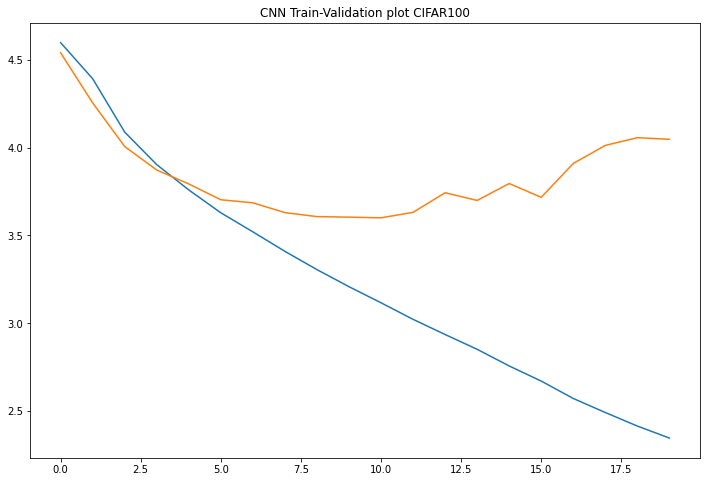

In [21]:
plt.figure(figsize=(12,8))
plt.plot(training_loss_history_)
plt.plot(validation_loss_history_)
plt.title("CNN Train-Validation plot CIFAR100")
plt.savefig("CNN Train-Validation plot CIFAR100.png")

In [22]:
myCnn=MyCNN().to(device)
training_epochs=11
batch_size=4
obj=nn.CrossEntropyLoss().to(device)
opt=SGD(myCnn.parameters(),lr=0.001, momentum=0.9)

In [26]:
start=time.time()

for epoch in range(training_epochs):
    training_loss=0.0
    validation_loss=0.0
    for X,y in tr100_loader:
        X=X.to(device)
        y=y.to(device)
        
        opt.zero_grad()
        output=myCnn(X) 
        cost=obj(output,y)
        cost.backward()
        opt.step()
        
print("Time :",time.time()-start)

Time : 80.64506006240845


In [27]:
ts100_loader=DataLoader(dataset=ts100,
                      batch_size=batch_size,
                      shuffle=False)

In [28]:
start=time.time()

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in ts100_loader:
        images, labels = data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = myCnn(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy :',(100 * correct / total))
print("Time :",time.time()-start)

Accuracy : 16.85
Time : 4.014480113983154
